## Watermelonizer 5000 - Object Detection

reference:https://github.com/ultralytics/yolov5/issues/36


In [20]:
## Installs

## !pip install opencv-python

## !pip install seaborn


In [21]:
################################################
##
## Object Detection
##
################################################

import torch
import numpy as np
import pandas as pd
import sklearn
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import math
import os
import torchvision
from torchvision.io import read_image
import torchvision.transforms as T

from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
## from mlxtend.plotting import heatmap

## coefficient of determination (R**2)
from sklearn.metrics import r2_score

#######################################################

np.set_printoptions(suppress=True)
torch.set_printoptions(sci_mode=False)




In [22]:

#######################################################

full_path = '/Users/user/Desktop/UGA_agi/code/data/'

#######################################################


In [23]:

images_path = full_path
## dir_list = os.listdir(images_path)
dir_list = [f for f in os.listdir(images_path) if f.endswith('.JPG')]
print(dir_list)



['IMG_7009.JPG', 'IMG_6868.JPG', 'IMG_7223.JPG', 'IMG_7237.JPG', 'IMG_6934.JPG', 'IMG_7394.JPG', 'IMG_7380.JPG', 'IMG_7419.JPG', 'IMG_7357.JPG', 'IMG_7343.JPG', 'IMG_7425.JPG', 'IMG_7169.JPG', 'IMG_7424.JPG', 'IMG_7430.JPG', 'IMG_7356.JPG', 'IMG_7418.JPG', 'IMG_7395.JPG', 'IMG_6909.JPG', 'IMG_6841.JPG', 'IMG_6869.JPG', 'IMG_6857.JPG', 'IMG_6894.JPG', 'IMG_7220.JPG', 'IMG_6880.JPG', 'IMG_7397.JPG', 'IMG_7354.JPG', 'IMG_7432.JPG', 'IMG_7157.JPG', 'IMG_7355.JPG', 'IMG_7369.JPG', 'IMG_6936.JPG', 'IMG_7221.JPG', 'IMG_6881.JPG', 'IMG_7741.JPG', 'IMG_6852.JPG', 'IMG_6846.JPG', 'IMG_6891.JPG', 'IMG_6885.JPG', 'IMG_7225.JPG', 'IMG_6926.JPG', 'IMG_7392.JPG', 'IMG_7345.JPG', 'IMG_7423.JPG', 'IMG_7437.JPG', 'IMG_7351.JPG', 'IMG_7184.JPG', 'IMG_7190.JPG', 'IMG_7191.JPG', 'IMG_7378.JPG', 'IMG_7436.JPG', 'IMG_7422.JPG', 'IMG_6933.JPG', 'IMG_7393.JPG', 'IMG_7387.JPG', 'IMG_6927.JPG', 'IMG_6884.JPG', 'IMG_6847.JPG', 'IMG_6853.JPG', 'IMG_6845.JPG', 'IMG_6851.JPG', 'IMG_6879.JPG', 'IMG_7232.JPG', 'IMG_69

In [24]:
print(len(dir_list))

295


In [25]:

## version 3
## model = torch.hub.load('ultralytics/yolov3', 'yolov3')  # or yolov3-spp, yolov3-tiny, custom



## version 5
model = torch.hub.load('ultralytics/yolov5', 'yolov5n') 


Using cache found in /Users/user/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-2-6 Python-3.7.16 torch-1.13.1 CPU

Fusing layers... 
YOLOv5n summary: 213 layers, 1867405 parameters, 0 gradients
Adding AutoShape... 


In [27]:

## model.conf = 0.25       ## confidence threshold (0.0 - 1.0)
## model.iou  = 0.45       ## NMS IoU threshold (0.0 - 1.0)


model.conf = 0.05  # NMS confidence threshold
model.iou = 0.05  # NMS IoU threshold
model.agnostic = False  # NMS class-agnostic
model.multi_label = False  # NMS multiple labels per box
model.classes = None  # (optional list) filter by class, i.e. = [0, 15, 16] for COCO persons, cats and dogs
model.max_det = 20  # maximum number of detections per image
model.amp = False  # Automatic Mixed Precision (AMP) inference

## results = model(im, size=320)  # custom inference size



## Inference Object detection on a Fruit image

In [28]:

filename = dir_list[34]

img = full_path + filename      # or file, Path, PIL, OpenCV, numpy, list

results = model(img)

  
## results.crop() 

crops = results.crop(save=True)  # cropped detections dictionary
results.save()




Saved 1 image to runs/detect/exp4
Saved results to runs/detect/exp4

Saved 1 image to runs/detect/exp5


## Process inference output

In [29]:

## img_temp = results.show()    # or .show(), .save(), .crop(), .pandas(), etc.

results.print()



image 1/1: 4272x2848 1 person, 1 traffic light, 2 frisbees, 1 refrigerator, 1 clock
Speed: 188.4ms pre-process, 126.4ms inference, 0.7ms NMS per image at shape (1, 3, 640, 448)


In [30]:

results.xyxy[0]


tensor([[  792.66357,  2483.68188,  1567.07886,  2921.19580,     0.28276,    29.00000],
        [  793.14819,  1411.15430,  1531.16162,  1888.13770,     0.22944,    29.00000],
        [  727.28040,  1429.29175,  1540.64001,  1897.47705,     0.21784,    74.00000],
        [  793.41882,     0.06352,  1299.74402,   369.73248,     0.20474,     0.00000],
        [ 1916.43335,  2282.89209,  2823.95996,  3404.81470,     0.08035,    72.00000],
        [  235.11758,   742.18536,  1961.81396,  3563.88721,     0.07876,     9.00000]])

In [31]:

results.pandas().xyxy[0]


xmin         ymin         xmax         ymax  confidence  class  \
0   792.663574  2483.681885  1567.078857  2921.195801    0.282765     29   
1   793.148193  1411.154297  1531.161621  1888.137695    0.229441     29   
2   727.280396  1429.291748  1540.640015  1897.477051    0.217844     74   
3   793.418823     0.063518  1299.744019   369.732483    0.204738      0   
4  1916.433350  2282.892090  2823.959961  3404.814697    0.080349     72   
5   235.117584   742.185364  1961.813965  3563.887207    0.078764      9   

            name  
0        frisbee  
1        frisbee  
2          clock  
3         person  
4   refrigerator  
5  traffic light

In [32]:
results.pandas().xyxy[0].sort_values('xmin')  # sorted left-right

xmin         ymin         xmax         ymax  confidence  class  \
5   235.117584   742.185364  1961.813965  3563.887207    0.078764      9   
2   727.280396  1429.291748  1540.640015  1897.477051    0.217844     74   
0   792.663574  2483.681885  1567.078857  2921.195801    0.282765     29   
1   793.148193  1411.154297  1531.161621  1888.137695    0.229441     29   
3   793.418823     0.063518  1299.744019   369.732483    0.204738      0   
4  1916.433350  2282.892090  2823.959961  3404.814697    0.080349     72   

            name  
5  traffic light  
2          clock  
0        frisbee  
1        frisbee  
3         person  
4   refrigerator

## To view sample predicted image

In [33]:
detected_fullpath = 'runs/detect/exp5/'

In [34]:
dir_list = os.listdir(detected_fullpath)
print(dir_list)

['IMG_6852.jpg']


In [35]:

sample_img_path = detected_fullpath + dir_list[0]

sample_img = T.ToPILImage()(read_image(sample_img_path))


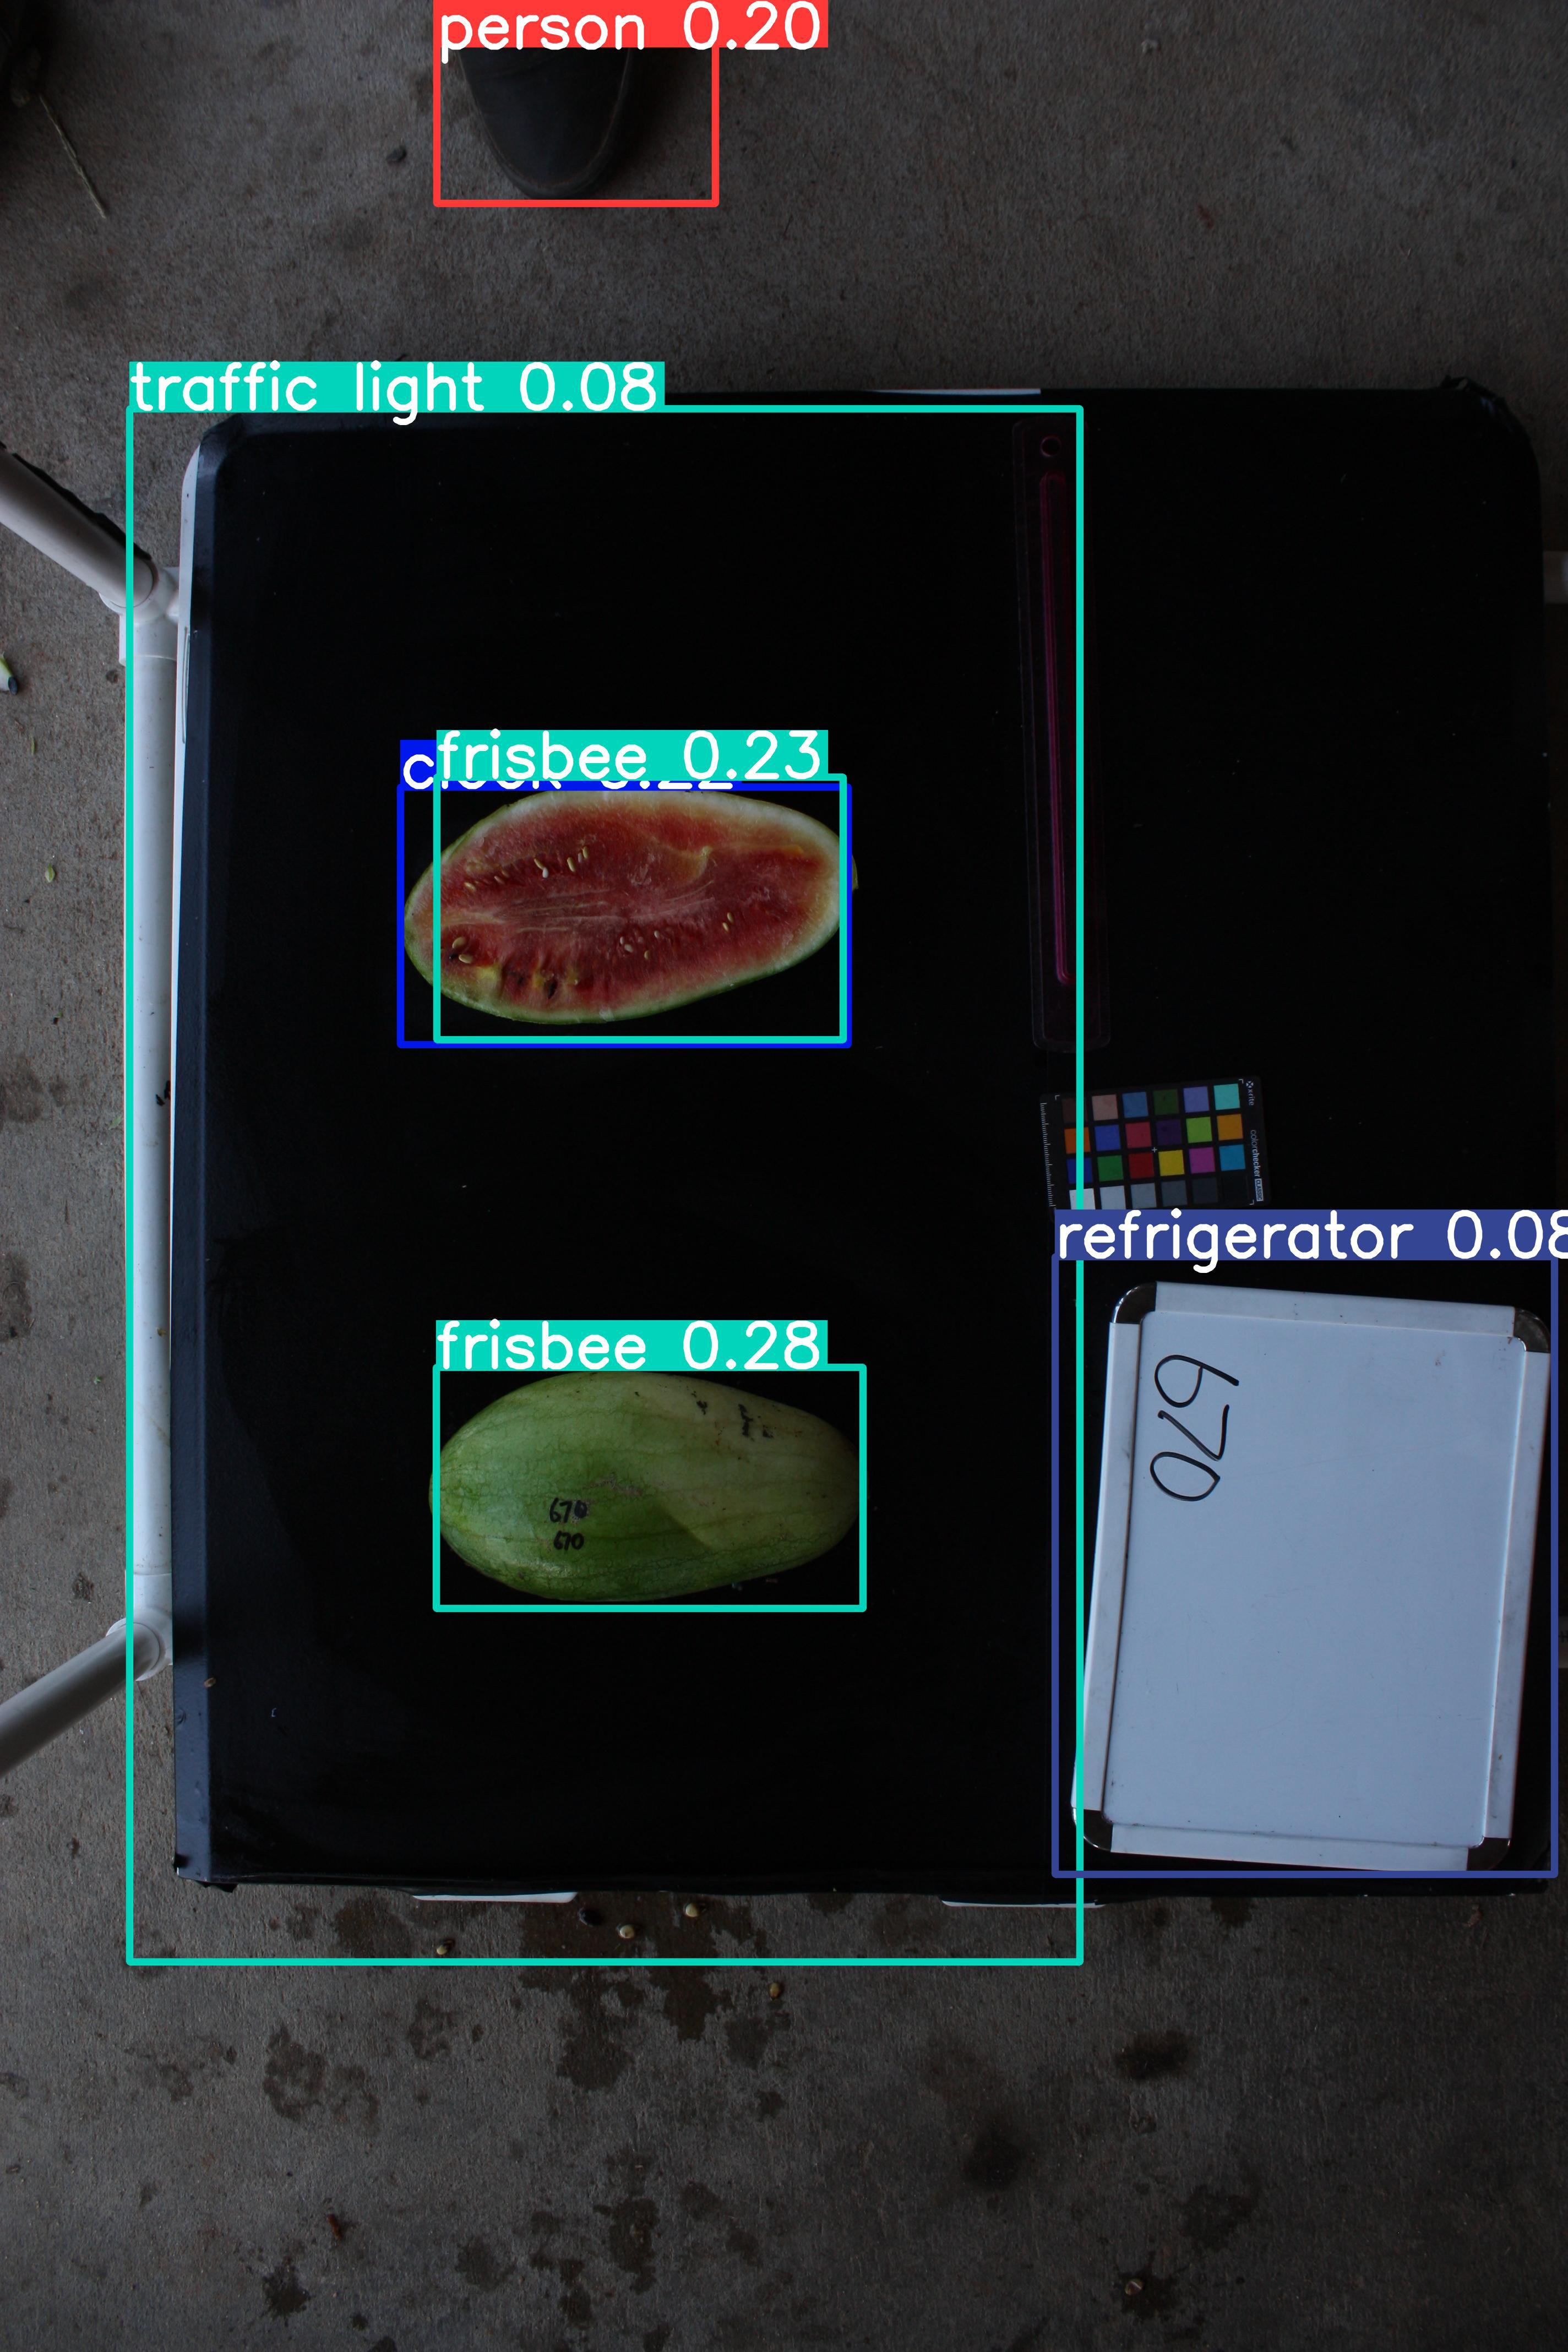

In [36]:
sample_img

## Detect and crop

In [ ]:

'''

for filename in dir_list:
    img = full_path + filename      # or file, Path, PIL, OpenCV, numpy, list

    results = model(img)
    
    ## results.print()  # or .show(), .save(), .crop(), .pandas(), etc.
    
    results.crop()
    ## results.show()
    results.save()
    
''' 
    


In [ ]:

'''

img_path1 = detected_images_path + 'plane737.jpg'      # or file, Path, PIL, OpenCV, numpy, list
img_path2 = detected_images_path + 'plane1.jpg'        # or file, Path, PIL, OpenCV, numpy, list
img_path3 = detected_images_path + 'obj5.jpg'          # or file, Path, PIL, OpenCV, numpy, list
img_path4 = detected_images_path + 'object6.jpg'       # or file, Path, PIL, OpenCV, numpy, list
img_path5 = detected_images_path + 'object4.jpg'       # or file, Path, PIL, OpenCV, numpy, list


img1 = T.ToPILImage()(read_image(img_path1))
img2 = T.ToPILImage()(read_image(img_path2))
img3 = T.ToPILImage()(read_image(img_path3))
img4 = T.ToPILImage()(read_image(img_path4))
img5 = T.ToPILImage()(read_image(img_path5))

img1

## img = read_image(images_path + 'plane2.jpg')
## img = T.ToPILImage()(img)

'''
